<a href="https://colab.research.google.com/github/Akhilesh653/CODSOFT--Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
creditcard= pd.read_csv('creditcard.csv')

In [3]:
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
round(creditcard.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.0,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


In [8]:
creditcard.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
creditcard.duplicated().sum()

1081

In [10]:
creditcard.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
creditcard["Class"].value_counts()

,count
Class,
0,284315
1,492


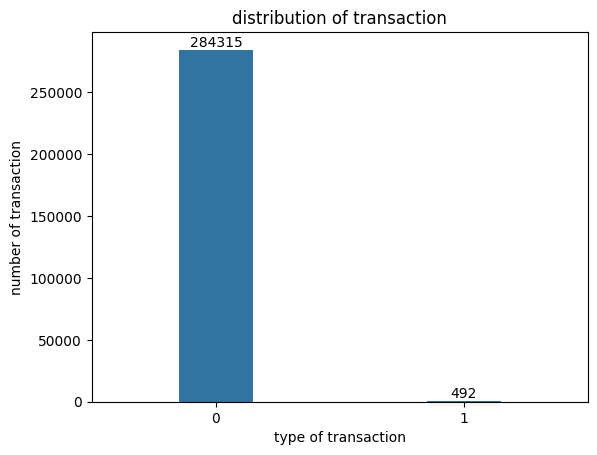

In [14]:
ax=sns.countplot(data=creditcard,x="Class",width=0.3)
ax.set_title("distribution of transaction")
ax.set_xlabel("type of transaction")
ax.set_ylabel("number of transaction")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

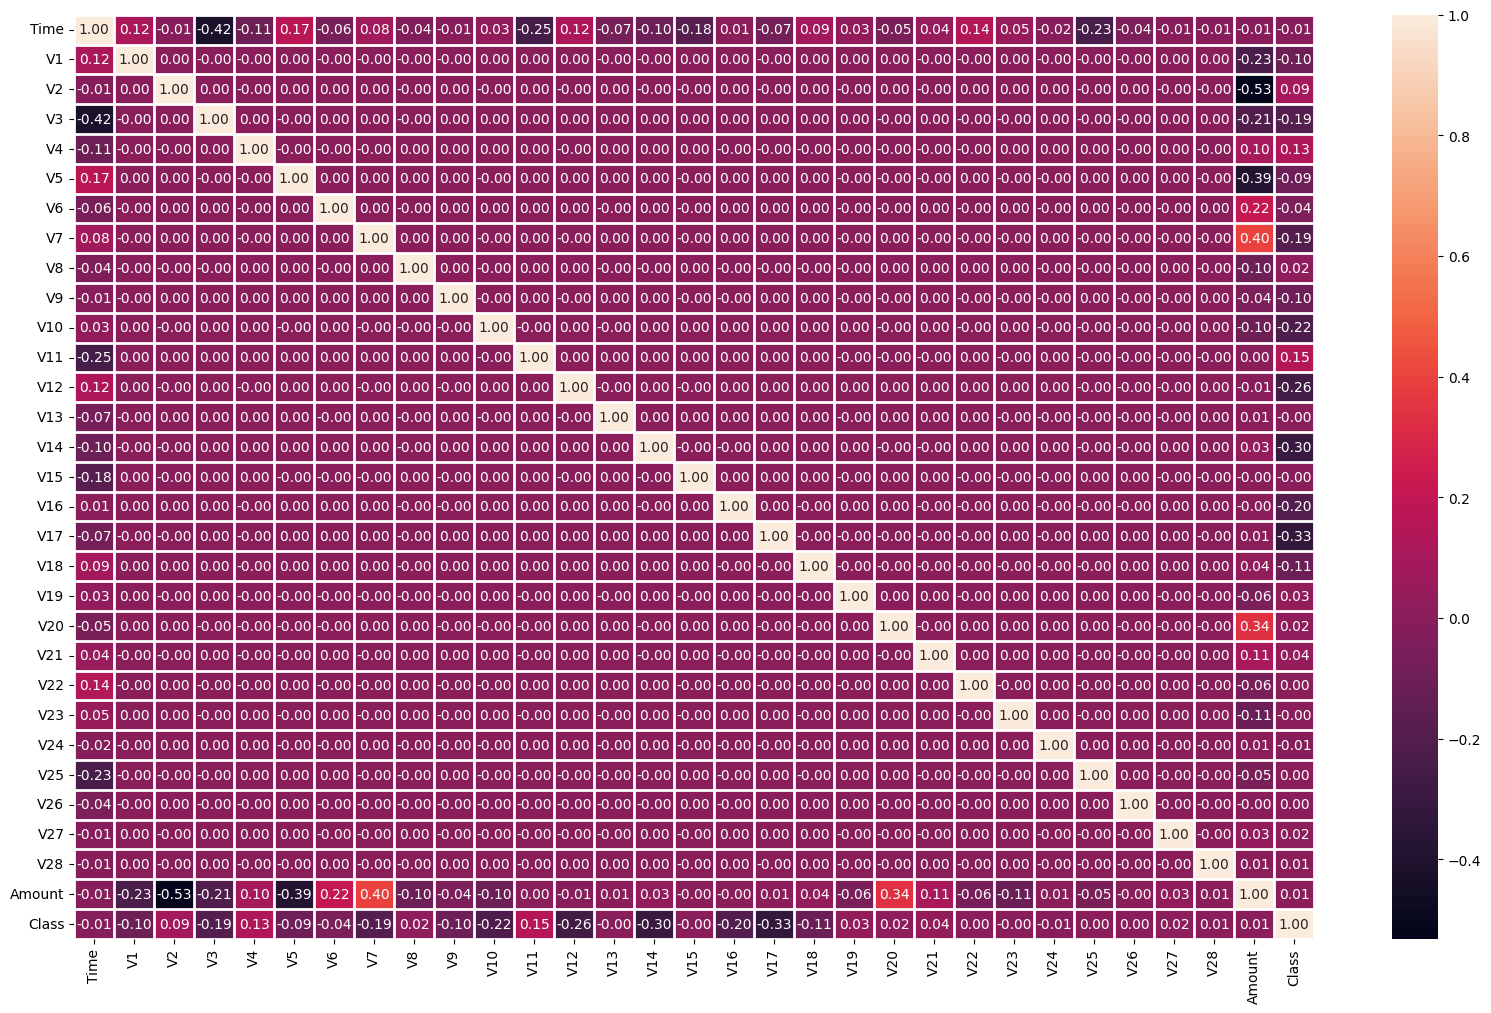

In [15]:
plt.figure(figsize=(20,12))
ax=sns.heatmap(creditcard.corr(),annot=True,fmt='.2f')
for i in range(creditcard.shape[1]+1):
    ax.axvline(i,color='white',lw=2)
    ax.axhline(i,color='white',lw=2)
plt.show()

In [37]:
def split_data_by_class(creditcard):
  legit_df = creditcard[creditcard['Class'] == 0]
  fraud_df = creditcard[creditcard['Class'] == 1]
  return legit_df,fraud_df
legit_df,fraud_df=split_data_by_class(creditcard)

In [38]:
legit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284315 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284315 non-null  float64
 1   V1      284315 non-null  float64
 2   V2      284315 non-null  float64
 3   V3      284315 non-null  float64
 4   V4      284315 non-null  float64
 5   V5      284315 non-null  float64
 6   V6      284315 non-null  float64
 7   V7      284315 non-null  float64
 8   V8      284315 non-null  float64
 9   V9      284315 non-null  float64
 10  V10     284315 non-null  float64
 11  V11     284315 non-null  float64
 12  V12     284315 non-null  float64
 13  V13     284315 non-null  float64
 14  V14     284315 non-null  float64
 15  V15     284315 non-null  float64
 16  V16     284315 non-null  float64
 17  V17     284315 non-null  float64
 18  V18     284315 non-null  float64
 19  V19     284315 non-null  float64
 20  V20     284315 non-null  float64
 21  V21     284315 

In [39]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64
 22  V2

In [40]:
legit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,94838.202258,47484.015786,0.000000,54230.000000,84711.000000,139333.000000,172792.000000
V1,284315.0,0.008258,1.929814,-56.407510,-0.917544,0.020023,1.316218,2.454930
V2,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
V3,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
V4,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
V5,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
V6,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
V7,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
V8,284315.0,-0.000987,1.161283,-73.216718,-0.208633,0.022041,0.326200,18.709255
V9,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.598230,15.594995


In [41]:
fraud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


In [42]:
new_legit_df=legit_df.sample(n=492)

In [43]:
print(new_legit_df)

            Time        V1        V2        V3        V4        V5        V6  \
85507    60799.0  1.245674  0.166975  0.488306  0.635322 -0.562777 -1.011073   
144242   85965.0 -4.697246 -7.492891  1.963272 -0.704097  4.517468 -4.260005   
127960   78538.0  1.544307 -0.352764 -0.788061 -0.979262  0.011865 -0.615147   
159761  112898.0  1.927351 -0.197973 -2.053014  0.036756  1.164684  1.159735   
229791  146052.0  0.385273  0.596798 -0.560534 -1.506014  1.016335 -1.420794   
...          ...       ...       ...       ...       ...       ...       ...   
61145    49685.0  0.980773 -0.760751  1.023758  0.089751 -0.934655  0.868597   
54199    46329.0 -0.863057  0.225429  2.458855  0.613099  0.067149  1.716173   
104514   69102.0  0.290401  2.019625 -1.987660  1.560433  0.727993 -1.702171   
263448  160960.0  1.750925 -0.709690 -1.666796  0.163325 -0.029306 -0.731969   
137698   82286.0  1.194328 -0.236384  0.575941  0.329506 -0.856706 -0.775972   

              V7        V8        V9  .

In [44]:
combine_df=pd.concat([new_legit_df,fraud_df],axis=0)


In [45]:
combine_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85507,60799.0,1.245674,0.166975,0.488306,0.635322,-0.562777,-1.011073,0.014953,-0.160211,0.170362,...,-0.262581,-0.816264,0.140304,0.357827,0.186423,0.096544,-0.035866,0.018495,8.99,0
144242,85965.0,-4.697246,-7.492891,1.963272,-0.704097,4.517468,-4.260005,-5.101901,0.868146,-1.453204,...,0.539920,-0.192885,1.554998,0.098036,-0.837137,-0.563470,-0.028497,0.317409,59.79,0
127960,78538.0,1.544307,-0.352764,-0.788061,-0.979262,0.011865,-0.615147,-0.078863,-0.302426,-1.003196,...,0.095182,0.197695,-0.334445,-0.983788,0.967064,0.003047,-0.033204,-0.012817,15.00,0
159761,112898.0,1.927351,-0.197973,-2.053014,0.036756,1.164684,1.159735,-0.268589,0.459589,0.514675,...,-0.282374,-0.733764,0.358543,-1.084450,-0.490049,0.284741,-0.029733,-0.059148,8.99,0
229791,146052.0,0.385273,0.596798,-0.560534,-1.506014,1.016335,-1.420794,1.762729,-0.736705,-0.186729,...,0.146134,0.722909,-0.195606,1.280429,0.083790,0.911662,-0.267488,-0.248234,27.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [46]:
combine_df["Class"].value_counts()

,count
Class,
0,492
1,492


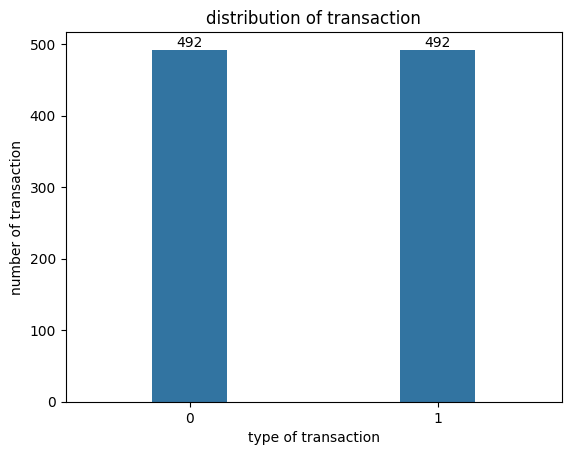

In [47]:
ax=sns.countplot(data=combine_df,x="Class",width=0.3)
ax.set_title("distribution of transaction")
plt.xlabel("type of transaction")
plt.ylabel("number of transaction")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [48]:
x=combine_df.drop(columns="Class",axis=1)
y=combine_df["Class"]

In [49]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
85507,60799.0,1.245674,0.166975,0.488306,0.635322,-0.562777,-1.011073,0.014953,-0.160211,0.170362,...,-0.132080,-0.262581,-0.816264,0.140304,0.357827,0.186423,0.096544,-0.035866,0.018495,8.99
144242,85965.0,-4.697246,-7.492891,1.963272,-0.704097,4.517468,-4.260005,-5.101901,0.868146,-1.453204,...,1.257206,0.539920,-0.192885,1.554998,0.098036,-0.837137,-0.563470,-0.028497,0.317409,59.79
127960,78538.0,1.544307,-0.352764,-0.788061,-0.979262,0.011865,-0.615147,-0.078863,-0.302426,-1.003196,...,0.090020,0.095182,0.197695,-0.334445,-0.983788,0.967064,0.003047,-0.033204,-0.012817,15.00
159761,112898.0,1.927351,-0.197973,-2.053014,0.036756,1.164684,1.159735,-0.268589,0.459589,0.514675,...,-0.314272,-0.282374,-0.733764,0.358543,-1.084450,-0.490049,0.284741,-0.029733,-0.059148,8.99
229791,146052.0,0.385273,0.596798,-0.560534,-1.506014,1.016335,-1.420794,1.762729,-0.736705,-0.186729,...,0.027217,0.146134,0.722909,-0.195606,1.280429,0.083790,0.911662,-0.267488,-0.248234,27.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [50]:
y

,Class
85507,0
144242,0
127960,0
159761,0
229791,0
...,...
279863,1
280143,1
280149,1
281144,1


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [66]:
print(x_train)

            Time        V1        V2        V3        V4        V5        V6  \
269590  163692.0 -0.702231  0.968873  2.106222 -0.432794 -0.123901 -0.137839   
161244  114022.0  0.116698  0.868660 -0.526617 -0.707973  0.997959 -0.398926   
150788   94031.0  2.032148  0.275943 -2.229659  1.114851  1.219816 -0.407266   
42007    40918.0 -3.140260  3.367342 -2.778931  3.859701 -1.159518 -0.721552   
230476  146344.0 -0.099724  2.795414 -6.423856  3.247513 -1.632290 -2.766665   
...          ...       ...       ...       ...       ...       ...       ...   
275405  166519.0 -0.808942  1.344082 -1.000165 -0.807987  0.826400 -0.363189   
204825  135468.0 -0.509037  1.608711 -1.598340 -0.722678  1.232296 -1.421262   
88897    62341.0 -5.267760  2.506719 -5.290925  4.886134 -3.343188 -1.100085   
266151  162211.0 -1.222909  0.078714  1.570061 -0.616569  1.204177 -0.499153   
191544  129308.0  0.054682  1.856500 -4.075451  4.100098 -0.800931 -0.292502   

              V7        V8        V9  .

In [67]:
print(x_train.shape,x_test.shape)

(738, 30) (246, 30)


In [68]:
model=LogisticRegression()

In [69]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
x_train_predict=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_predict,y_train)
print(f"the model's training data accuracy is:{round(training_data_accuracy * 100,2)}%")

the model's training data accuracy is:93.9%


In [71]:
x_test_predict=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_predict,y_test)
print(f"the model's testing data accuracy is:{round(test_data_accuracy * 100,2)}%")

the model's testing data accuracy is:97.15%


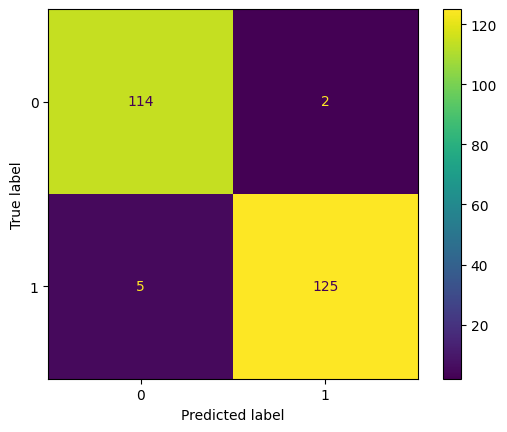

In [72]:
ax = ConfusionMatrixDisplay.from_predictions(y_test,x_test_predict)
plt.show()